# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/dive')

In [4]:
# read the file from the current directory
df = pd.read_csv('foodhub_order.csv')

In [5]:
# Exampine first 5 rows.
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- Columns order_id, customer_id, food_preparation_time and delivery_time are Integers (int64)
- Columns restaurant_namem cuisine_typem day_of_the_week and rating are Objects, upon inspection these columns contain string values
- Column cost_of_the_order is float (float64)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Find missing values
missing_values = df.isnull().sum()
print(missing_values)
df.head()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


##### Observation:
The dataset appears to have values for all the columns and there are no nulls. Sampling the data reveals that they are missing values for the 'rating' column and they are filled with 'Not given'. 

It would be beneficial to replace 'Not given' with an appropriate value. We can impute this using a mean or median of the rating, but rating can be influenced by various factors, like food preparation time, cost of the order, cuisine etc. Let's find the most influencing factor


Min: 3.0 Max: 5.0
Mean: 4.344234079173838. Median 5.0


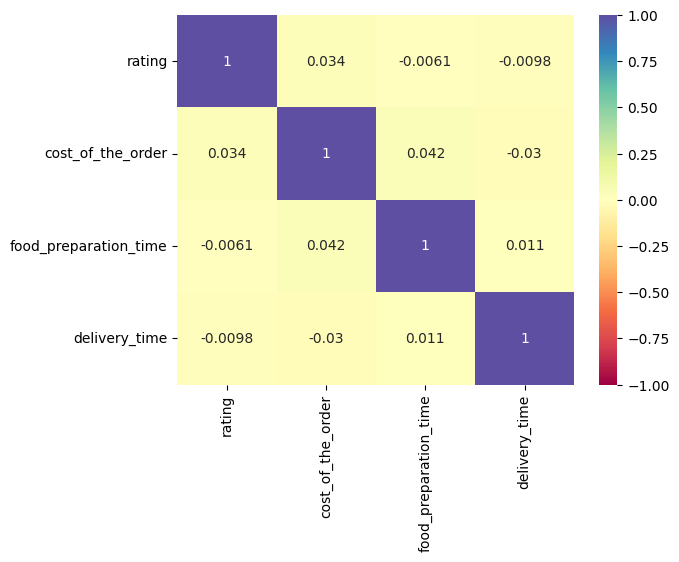

In [9]:
# Create a copy of the dataframe, so the original data is availalbe for reference
df_original = df.copy()

# Replace 'Not given' with NAN and convert the datatype to integer ignoring NaN
df['rating'] = df['rating'].replace('Not given',np.nan)
df['rating'] = df['rating'].astype(float, errors='ignore')

#Validate the min and max values for rating, ensure its with in 5
print(f'Min: {df["rating"].min()} Max: {df["rating"].max()}')

# Calculate the corrleation and pot it as heatmap to visualize the correlation
correlation = df[['rating', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
rating_corr = (correlation['rating']).sort_values(ascending=False)
sns.heatmap(correlation, annot=True,vmin=-1, vmax=1, cmap="Spectral")

print(f'Mean: {df["rating"].mean()}. Median {df["rating"].median()}')

##### Observation on Correlation
Inspecting the correlation, its evident that 
- cost_of_the_order has a weak correlation of 3%.
- food_preparation_time and delivery_time are close to 0.
##### Determine whether to use mean or median for the imputations
 - Mean: Can be used when the distribution is symmetrical without outliers
 - Median: Can be used for skewed distributions.

<Axes: xlabel='rating', ylabel='Count'>

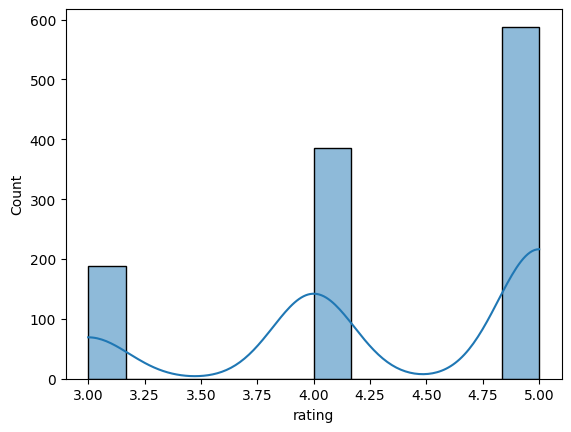

In [10]:
# plot the ratings to understand the distribution
sns.histplot(df['rating'].dropna(),  label='Rating', kde= True)


##### Observation on distribution:
Inspecting the distribution, its evident that 
- The majority of the values for rating is 5
- The distribution is not symmetrical, so we will go with median

Let's identify the most optimal method for imputing missing values by comparing the below median,
- Overall Median
- Median by cuisine type and day of week
- Median by cuisine type and restaurant
- Median by cuisine type, day of week and restaurant

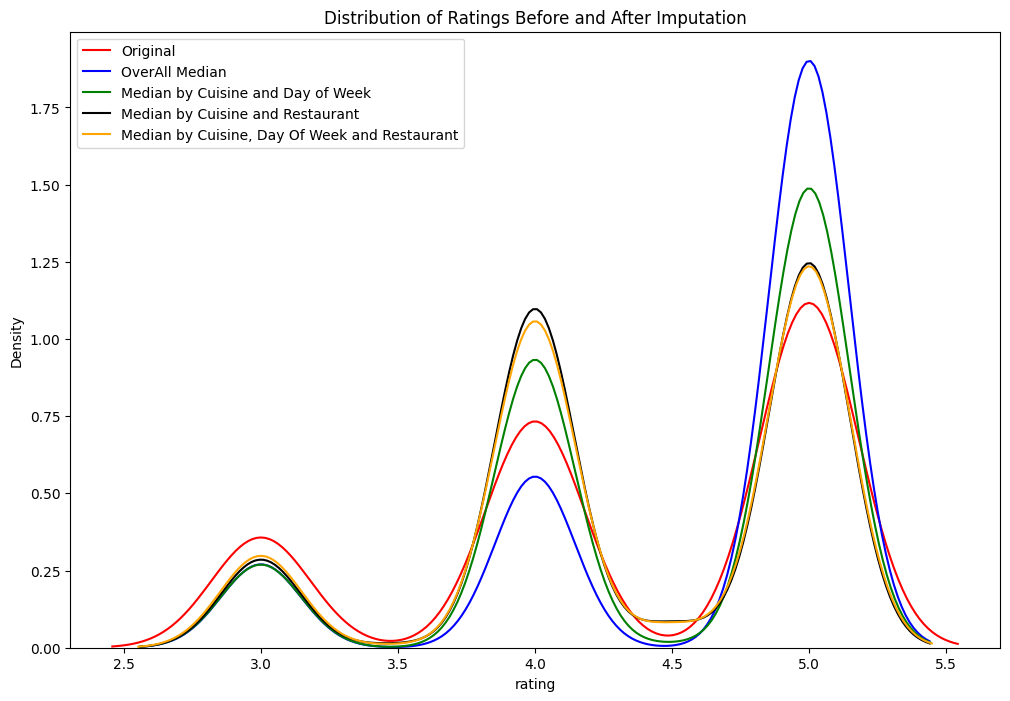

In [11]:

# Copy the dataset and replace the missing ratings with overall median of the rating column
rating_imputed_df_overall_median = df.copy()
rating_overall_median = df['rating'].median()
rating_imputed_df_overall_median['rating'].fillna(rating_overall_median, inplace=True)

# Copy the dataset and replace the missing ratings with median value for a given cuisine type and day of week.
rating_imputed_df_median_by_cuisine_dow = df.copy()
rating_medians_by_cuisine_dow = df.groupby(['cuisine_type', 'day_of_the_week'])['rating'].transform('median')
rating_imputed_df_median_by_cuisine_dow['rating'].fillna(rating_medians_by_cuisine_dow, inplace=True)

# Copy the dataset and replace the missing ratings with median value for a given cuisine type and restaurant.
rating_imputed_df_median_by_cuisine_restaurant = df.copy()
rating_medians_by_cuisine_restaurant = df.groupby(['cuisine_type', 'restaurant_name'])['rating'].transform('median')
rating_imputed_df_median_by_cuisine_restaurant['rating'].fillna(rating_medians_by_cuisine_restaurant, inplace=True)

# Copy the dataset and replace the missing ratings with median value for a given cuisine type, restaurant and day of week.
rating_imputed_df_median_by_cuisine_dow_restaurant = df.copy()
rating_medians_by_cuisine_dow_restaurant = df.groupby(['cuisine_type', 'day_of_the_week', 'restaurant_name'])['rating'].transform('median')
rating_imputed_df_median_by_cuisine_dow_restaurant['rating'].fillna(rating_medians_by_cuisine_dow_restaurant, inplace=True)

# Make the plot bigger for readability
plt.figure(figsize=(12, 8))

# plot these imputed ratings and find the optimal imputing method
# KDE plot will show the overall distribution of rating imputed by various medians
sns.kdeplot(df['rating'],  label='Original', color= 'red')
sns.kdeplot(rating_imputed_df_overall_median['rating'],  label='OverAll Median',color= 'blue')
sns.kdeplot(rating_imputed_df_median_by_cuisine_dow['rating'],  label='Median by Cuisine and Day of Week',color='green')
sns.kdeplot(rating_imputed_df_median_by_cuisine_restaurant['rating'],  label='Median by Cuisine and Restaurant',color='black')
sns.kdeplot(rating_imputed_df_median_by_cuisine_dow_restaurant['rating'],  label='Median by Cuisine, Day Of Week and Restaurant',color='orange')


plt.legend()
plt.title("Distribution of Ratings Before and After Imputation")
plt.show()



In [12]:
values = [
    [df['rating'].median(),df['rating'].isna().sum()],
    [rating_imputed_df_overall_median['rating'].median(),rating_imputed_df_overall_median['rating'].isna().sum()],
    [rating_imputed_df_median_by_cuisine_dow['rating'].median(),rating_imputed_df_median_by_cuisine_dow['rating'].isna().sum()],
    [rating_imputed_df_median_by_cuisine_restaurant['rating'].median(),rating_imputed_df_median_by_cuisine_restaurant['rating'].isna().sum()],
    [rating_imputed_df_median_by_cuisine_dow_restaurant['rating'].median(),rating_imputed_df_median_by_cuisine_dow_restaurant['rating'].isna().sum()]
]
cols= ['Median','Nulls']
index= ['Original','OverAll Median','Median by Cuisine and Day of Week','Median by Cuisine and Restaurant','Median by Cuisine, Day Of Week and Restaurant']

counts_df = pd.DataFrame(values, columns= cols, index=index)
print(counts_df)


                                               Median  Nulls
Original                                          5.0    736
OverAll Median                                    5.0      0
Median by Cuisine and Day of Week                 5.0      1
Median by Cuisine and Restaurant                  4.0     30
Median by Cuisine, Day Of Week and Restaurant     4.0     65


##### Observation on various imputations:
Its evident that the imputation by 'Median by Cuisine, Day Of Week' retains the distribution as in the original dataset in all the bins.
However there is 1 null left, so we will fill that row with the overall median still retaining the distribution.

In [13]:
df['rating'].fillna(rating_medians_by_cuisine_dow, inplace=True)
df['rating'].fillna(rating_overall_median, inplace=True)
print(f'Number of null ratings: {df["rating"].isna().sum()}')



Number of null ratings: 0


#### Observations:
The dataset appeared to have values for all the columns and there are no nulls. Sampling the data revealed that they are missing values for the 'rating' column and they are filled with 'Not given'.

By analyzing the correlations we found that there was not strong correlation between 'rating' and numeric columns. We analyzed the distribution of the data and found imputing with 'median' is optimal as the 'rating' is not symmetrically distributed. 

Further we calcuated the median for various groups to preserve the group level trends and finalized on imputing the 'rating' using the median calculated over the group 'Cuisine and Day of Week' and filled the last missign values with overall median ensuring we have rating for all the rows

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


<Axes: xlabel='food_preparation_time'>

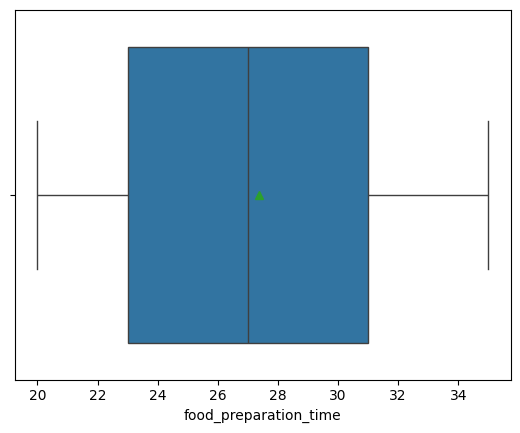

In [14]:
# Display the statistical summary which contains min, average and max
print(df['food_preparation_time'].describe())

#visualize to identify any outliers
sns.boxplot(x=df["food_preparation_time"], showmeans=True)


#### Observations:
* Minimum: 20 
* Average: 27.371970
* Maximum: 35

From the box plot created for this column, we observe no significant outliers, which is further supported by the fact that the mean and median values are close to each other


### **Question 5:** How many orders are not rated? [1 mark]

In [15]:
print(df_original['rating'].value_counts())


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


#### Observations:
There are 736 Order without a rating

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

We will list the columns and do an Univarite Analysis of each of the columns in the sections below.

In [16]:
# List all columns and data types
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


##### Order Id

In [17]:
# Count The number of order ids
total_count = df['order_id'].count()
# Get the number of unique values in the column
unique_order_count = df['order_id'].nunique()
print(f'Numbe of Orders: {unique_order_count}')
print('There are no duplicate orders' if unique_order_count == total_count else f'There {total_count-unique_order_count} duplicate Orders')
    

Numbe of Orders: 1898
There are no duplicate orders


* Numbe of Orders: 1898
* There are no duplicate orders

#### Customer Id

Number of customers : 1200


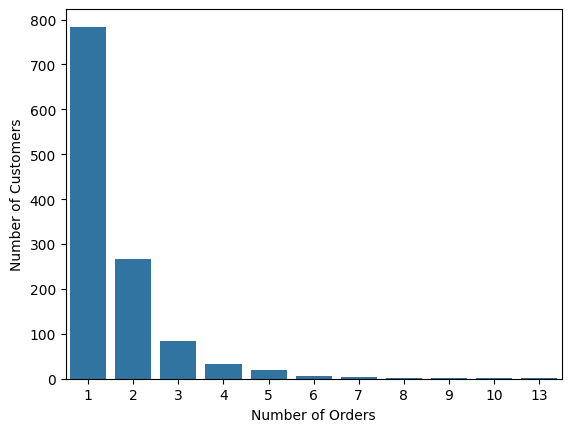

In [18]:
# Count the number of unique customer ids
print(f'Number of customers : {df["customer_id"].nunique()}')


#Find the number of orders by each customer
orders_per_customer = df['customer_id'].value_counts()

# Plot it as count plot to determine the number of frequent customers
sns.countplot(x=orders_per_customer)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()




- Uniquely identifies a customer.
- There are 12,00 Unique Customers.
- Majority of the customers have used the service only once

#### Restaurant Name

Number of restaturants: 178


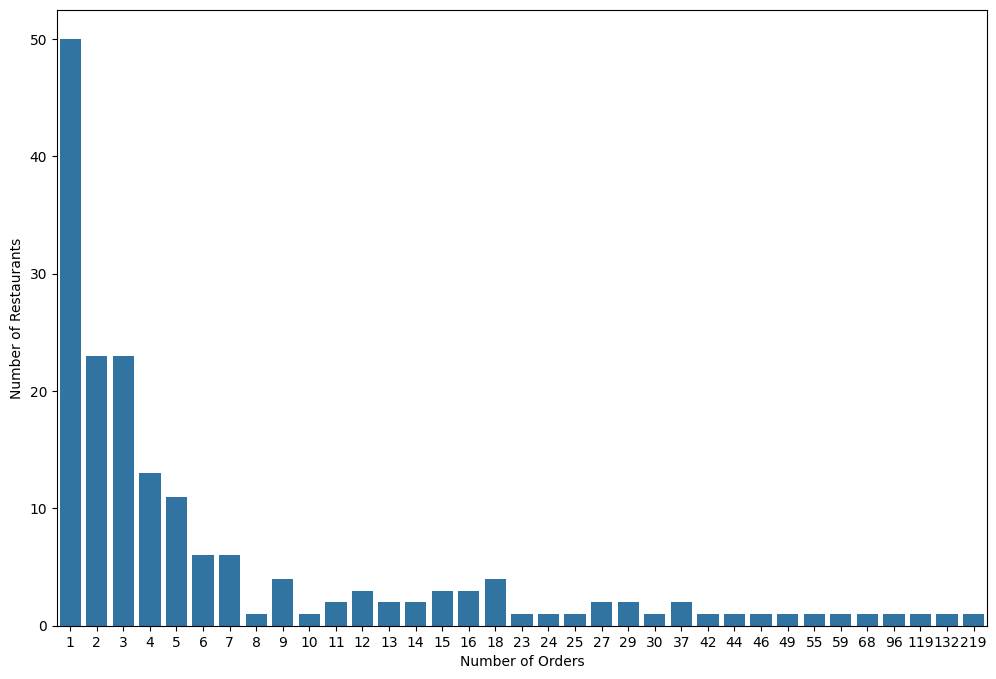

Shake Shack          219
The Meatball Shop    132
Blue Ribbon Sushi    119
Name: restaurant_name, dtype: int64


In [19]:
# Count the number of unique restaturant names
num_restaturants=df['restaurant_name'].nunique()

print(f'Number of restaturants: {num_restaturants}')

#Find the number of orders for each restaurant
orders_per_restaurant = df.groupby('restaurant_name')['order_id'].count()

# Plot it as count plot to determine the number of orders served by restaturants
# Make the plot bigger for readability
plt.figure(figsize=(12, 8))
sns.countplot(x=orders_per_restaurant)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Restaurants')
plt.show()
print(df['restaurant_name'].value_counts().head(3))

- There are 178 restaurants.
- Majority of the restaurants have served only one order.
- The top 3 restaturants are
  * Shake Shack serving 219 orders.
  * The Meatball Shop serving 132 orders.
  * Blue Ribbon Sushi serving 119 orders.

#### Cuisine Type

Number distinct cuisines : 14


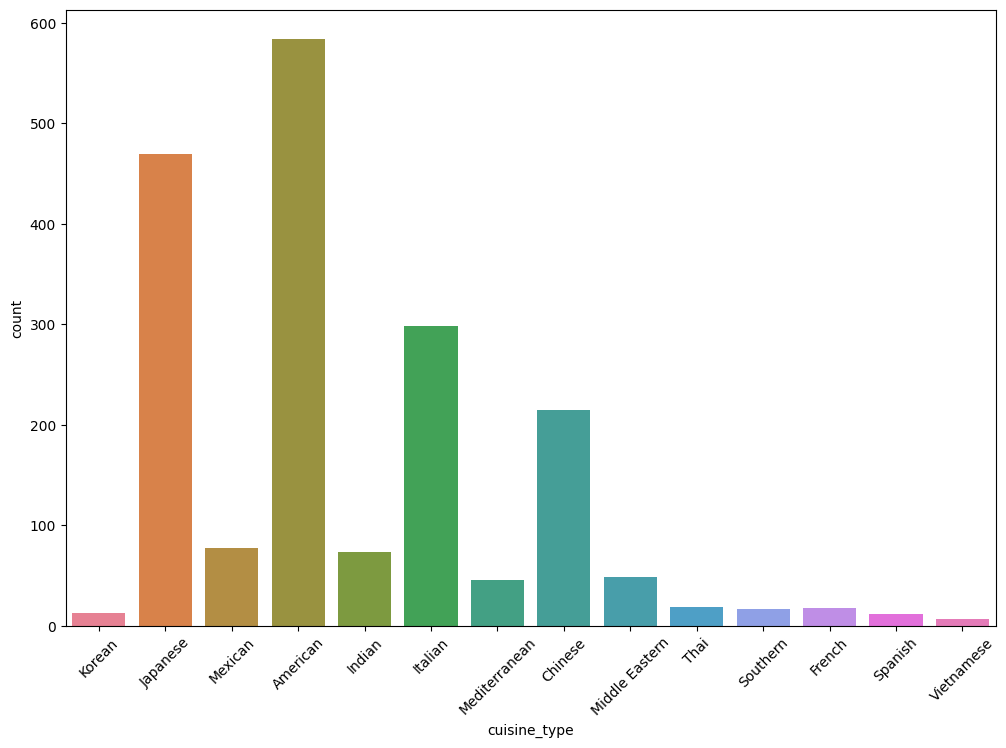

cuisine_type
American    584
Japanese    470
Italian     298
Name: order_id, dtype: int64


In [20]:
# Count the number of distinct cuisine_types
num_cuisine_types = df['cuisine_type'].nunique()

print(f'Number distinct cuisines : {num_cuisine_types}')

# count the number of order per cuisine type
orders_per_cuisine = df.groupby('cuisine_type')['order_id'].count()

# Plot it as count plot to determine the number of ordrs per cuisone type
# Make the plot bigger for readability
plt.figure(figsize=(12, 8))
sns.countplot(x=df['cuisine_type'], hue=df['cuisine_type'])
plt.xticks(rotation=45)

plt.show()

top_cuisines = orders_per_cuisine.sort_values(ascending=False).head(3)
print(top_cuisines)


- There are 14 cuisines avaialble through this service.
- The top 3 Cuisines are
  * American with 584 orders.
  * Japanese with 470 orders.
  * Italian with 298 orders.

#### Cost of the Order

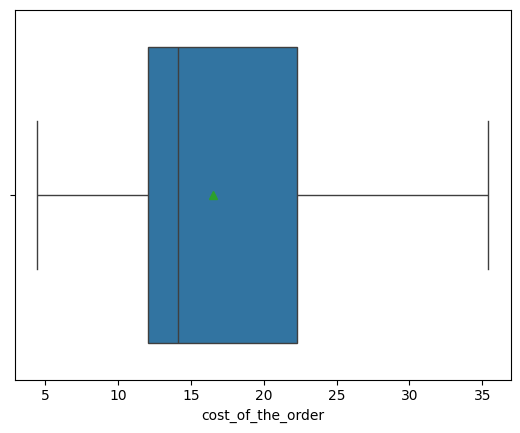

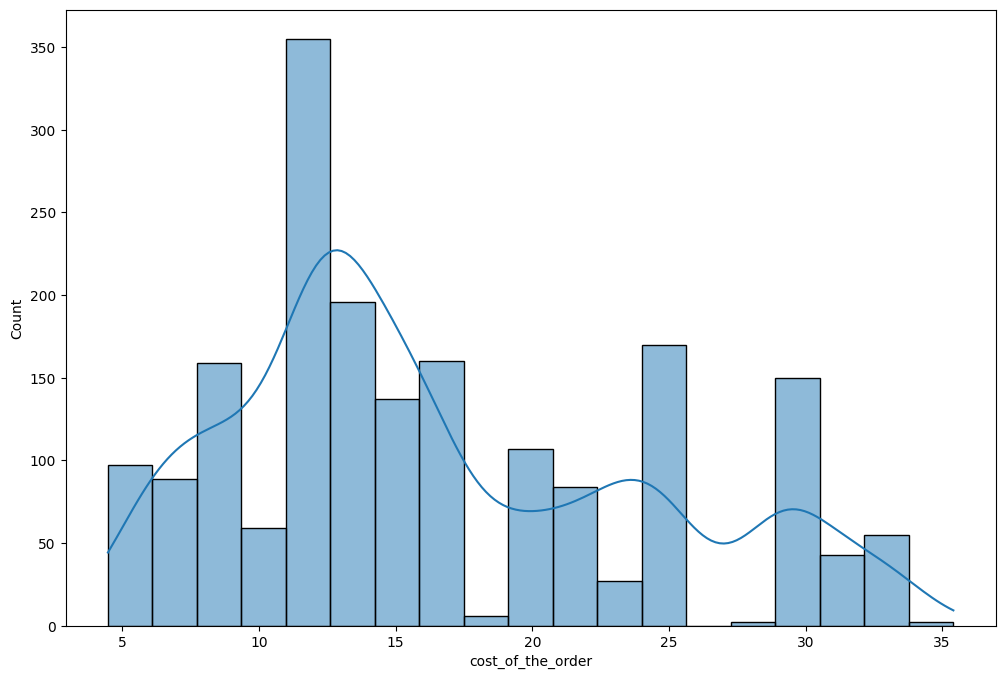

In [21]:
# Plot cost_of_the_order in boxplot to determine the outliers
sns.boxplot(data=df,x='cost_of_the_order',showmeans=True)
plt.show()

# Plot cost_of_the_order in histogram to determine the distribution
plt.figure(figsize=(12, 8))
sns.histplot(data=df,x='cost_of_the_order', kde=True)
plt.show()



- From the histogram its evident that cost_of_the_order is not symmetrically distributed
- From the boxplot, its evident that there are no significant outliers
  * Minimum cost of the order is around \\$5, with a maximum of around \\$35
  * The 25th percentile is around \\$12, and 50th percentile around \\$14 and 75th percentile around \\$22
  * The mean is around \\$16, slightly above the 50th percentile (right skewed), indicating most of the orders are concentrated at a lower price range.

#### Day of the week

<Axes: xlabel='day_of_the_week', ylabel='count'>

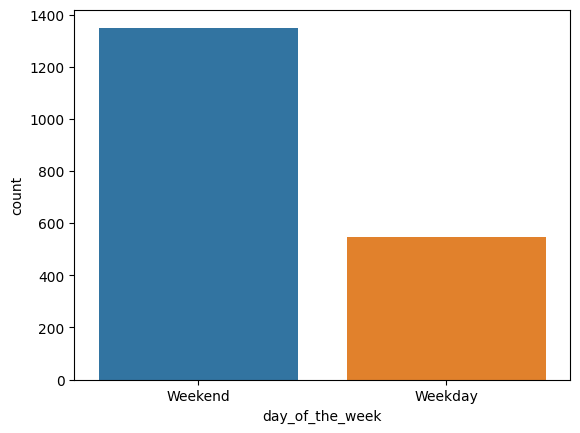

In [22]:
sns.countplot(data = df, x = 'day_of_the_week', hue='day_of_the_week')

* There are 2 unique values (Weekend and Weekday)
* Around 13,500 orders were placed on the Weekend while Weekdays around 500 orders
  * Shows customers prefer the service during the weekend over weekdays

#### Rating

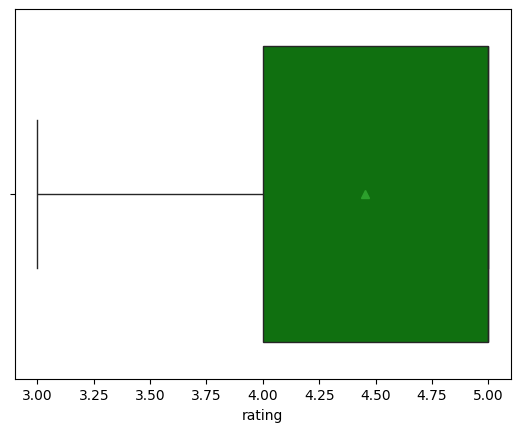

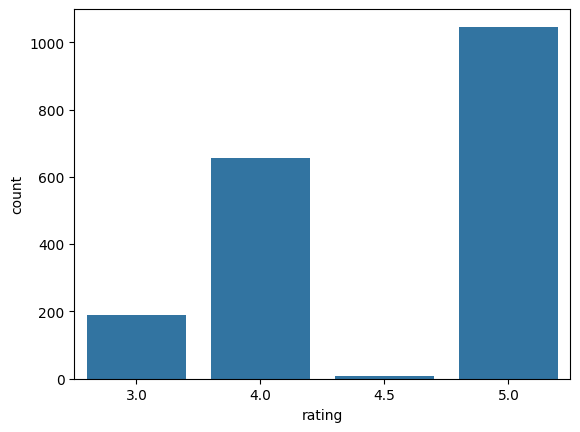

In [23]:
# Plot rating in boxplot to determine the outliers
sns.boxplot(data=df,x='rating',showmeans=True, color='green')
plt.show()

# Count plot to understand the number of order in each rating category
sns.countplot(data=df,x='rating')
plt.show()




* This observation is on the imputed rating
* Most of the orders are given a rating of 5, signifying the customers are very satisified with the service
* The median, 75th percentile and max are at the same value, denoting most of the orders have a rating of 5
* The mean is less than median (left skewed) signifying that there are less orders with a lower rating

#### Food Preparation time

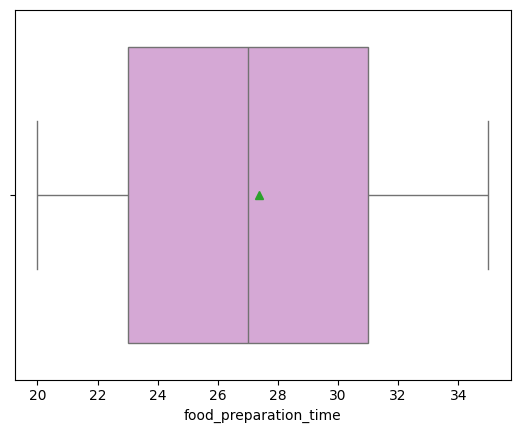

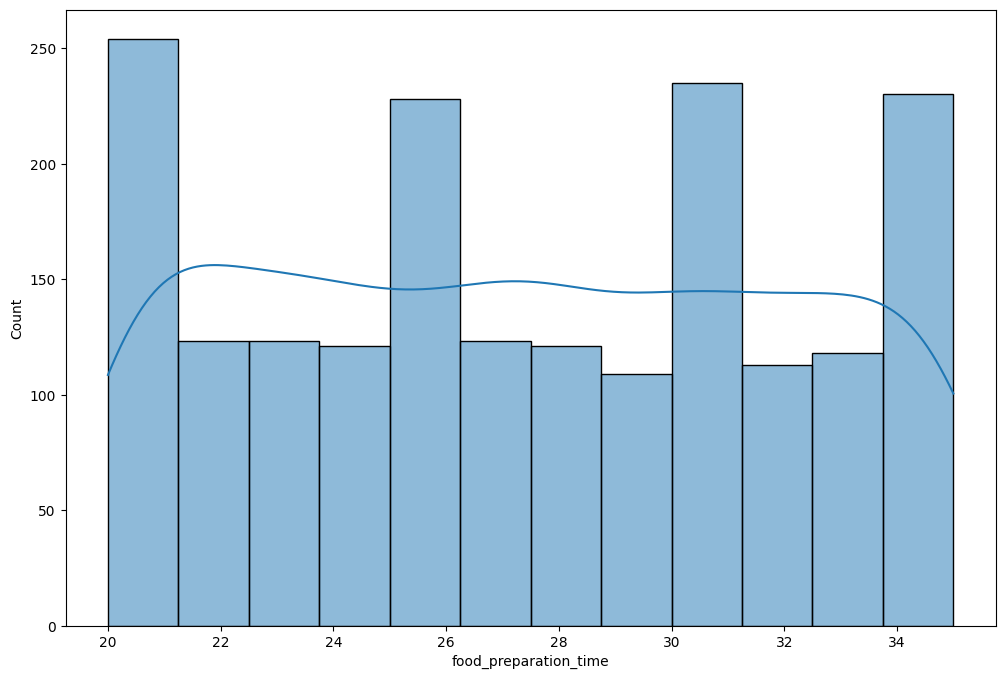

In [24]:
#Plot a box plot to understand the outliers
sns.boxplot(data=df,x='food_preparation_time',showmeans=True, color='plum')
plt.show()

#Plot an histogram with kde to understand the distribution
plt.figure(figsize=(12, 8))
sns.histplot(data=df,x='food_preparation_time', kde=True)
plt.show()


* Looking at the density the food preparation time is almost uniformly distributed.
* There are not outliers and the mean and median are close which signifies the time taken to prepare an order ranges from 20 to 34 minutes.
* The preparation time is consistent and predictable. 

#### Delivery Time

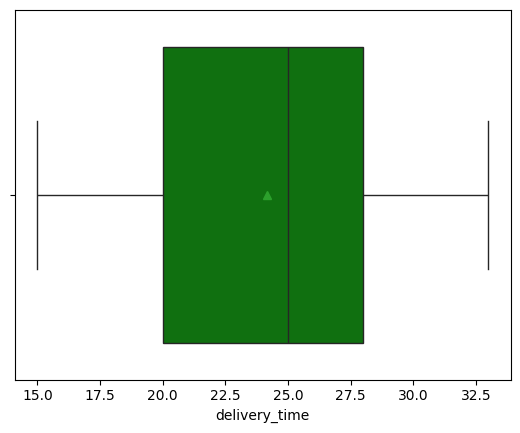

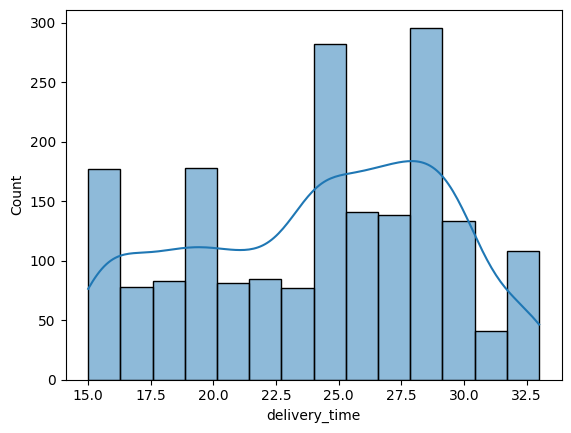

In [25]:
#Plot a box plot to understand the outliers
sns.boxplot(data=df,x='delivery_time',showmeans=True, color='green')
plt.show()

# Host plot to understand the distribution
sns.histplot(data=df,x='delivery_time', kde=True)
plt.show()


* The delivery time is slightly left skewed with mean less than the median.
* The delivery time ranges from 15 to 33 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [26]:
#Find top 5 restaurants
df['restaurant_name'].value_counts().sort_values(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants are

|Restaurant Name|Number of Orders|
|:-             | :-:|
|Shake Shack|                  219|
|The Meatball Shop|            132|
|Blue Ribbon Sushi|           119|
|Blue Ribbon Fried Chicken|     96|
|Parm|                          68|


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [27]:
# Filter the weekend orders
df_weekend_orders = df[df['day_of_the_week'] == 'Weekend']

#Get the count by cuisine type and get the top 1 restaturant
top_cuisine = df_weekend_orders['cuisine_type'].value_counts().sort_values(ascending=False).head(1)

#Calculate percentage
percentage = (top_cuisine[0]/df_weekend_orders.shape[0])*100

#Print results
print(top_cuisine)
print(f'Total Orders: {df.shape[0]}. Weekend Orders: {df_weekend_orders.shape[0]}. Percentage:{percentage}')



American    415
Name: cuisine_type, dtype: int64
Total Orders: 1898. Weekend Orders: 1351. Percentage:30.717986676535897


#### Observations:
* The most popular cuisine is 'American' with a total of 415 orders, which makes 30% of total orders in a weekend


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [28]:
# Filter orders over $20
df_orders_over_20 = df[df['cost_of_the_order']>20]

# Calculate percentage, by diving
percentage = (df_orders_over_20.shape[0]/df.shape[0])*100

print(f'Total Orders: {df.shape[0]}. Orders over $20: {df_orders_over_20.shape[0]}. Percentage:{percentage}')


Total Orders: 1898. Orders over $20: 555. Percentage:29.24130663856691


#### Observations:
29.24% of the orders were over \\$20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [29]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
Mean of delivery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [30]:
# The value count counts the number of rows (orders) per customer id
df['customer_id'].value_counts().sort_values(ascending=False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top 3 customer ids are
|Customer ID | Number Of Orders |
|:-|:-:|
|52832|    13|
|47440|   10|
|83287|    9|

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


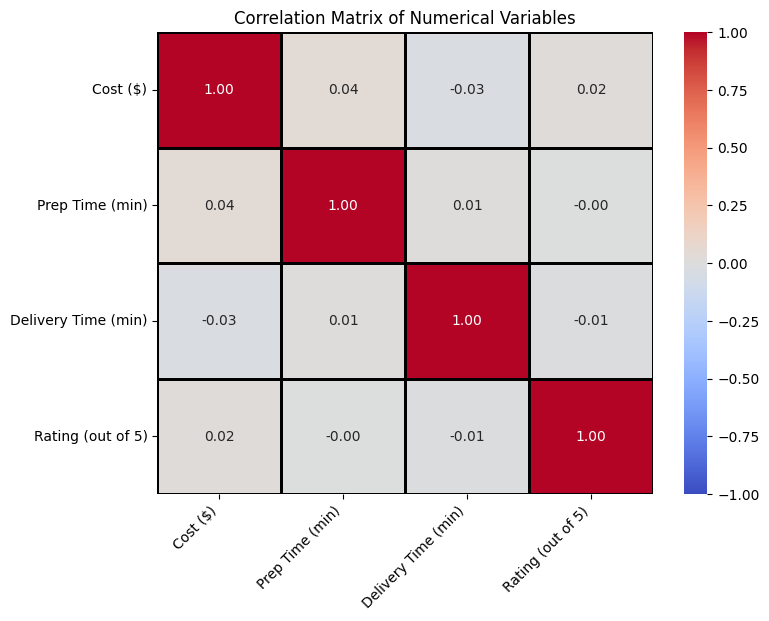

In [31]:
""" Calculate the correlation matrix to understand relationships between the numerical variables like
cost_of_the_order, food_preparation_time, delivery_time, rating (imputed) """


corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True,vmin=-1, vmax=1, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
# Customize x and y labels
ax.set_xticklabels(['Cost ($)', 'Prep Time (min)', 'Delivery Time (min)', 'Rating (out of 5)'], rotation=45, ha='right')
ax.set_yticklabels(['Cost ($)', 'Prep Time (min)', 'Delivery Time (min)', 'Rating (out of 5)'], rotation=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


##### Observation on Correlation
Based on the correlation heatmap, the relationships between the numneric values (Cost of the Order, Food Preparation Time, Delivery Time and Rating) in the dataset are quite weak, as indicated by the low correlation values. Here's a summary of your findings:

- Food Preparation Time vs Cost of the Order:
   * Correlation: 0.04 (Weak positive correlation)
   * Interpretation: There is a very slight positive relationship between food preparation time and the cost of the order. Though high cost order seems to have slightly higher preparation time, the relationship is not strong enough to make any significant conclusions.
- Delivery Time vs Cost of the Oder:
   * Correlation: -0.03 (Very weak negative correlation)
   * We can conclude that the cost of the order does not influence the delivery time in a meaningful way.
- Rating vs Cost of the Order:
   * Correlation: 0.02 (Very weak positive correlation)
   * Cost of the order has no meaningful influence on the rating.
- Delivery Time vs Food Preparation Time:
   * Correlation: 0.01 (Negligible correlation)
   * Food preparation time does not have any meaningful influence on the delivery time
- Rating vs Food Preparation Time:
   * Correlation: -0.00 (Negligible correlation)
   * Food preparation time has no meaningful impact on customer ratings
- Rating vs Delivery Time
   * Correlation: -0.01 (Negligible correlation)
   * Delivery time does not significantly influence the ratings given by customers.



#### Top N restaurants by Revenue

Total revenue: 31314.82. Revenue from Top 10 Restaurants: 14546.49. Percentage: 46.452414543656964


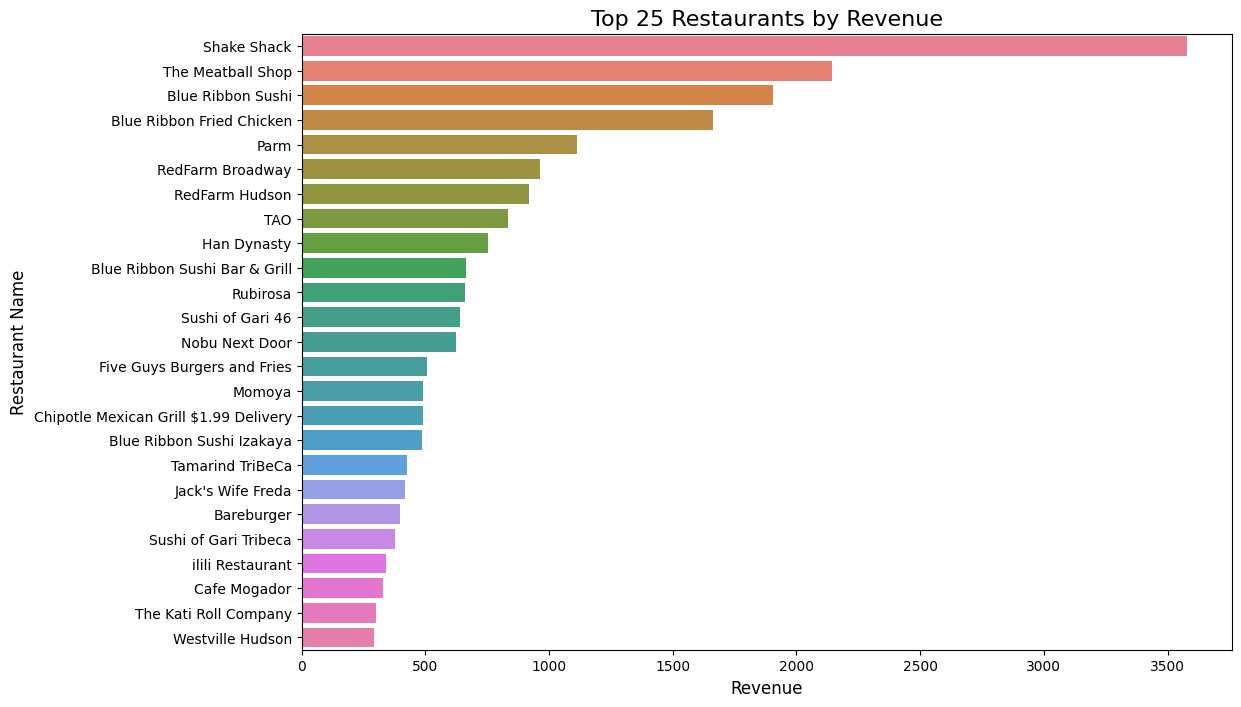

In [32]:
#Group the orders by restaturant and calculate the sum for "cost of the order"
top_restaurants = df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head(25)

# sum all the cost of the order to get the total revenuse so we can calculate the percentage.
total_revenue =df["cost_of_the_order"].sum();
# Get sum of cost of the order from the top 10 restaurants to calcuate the revenue.
revenue_from_top_10=top_restaurants.head(10).sum()

#calculate the percentage of revenue generated by top 10 restaturants.
percentage= (revenue_from_top_10/total_revenue)*100
print (f'Total revenue: {total_revenue}. Revenue from Top 10 Restaurants: {revenue_from_top_10}. Percentage: {percentage}')

#Plot the top 25 restaturants to viasualize, using a bar plot so see the ranking and distribution
plt.figure(figsize=(12, 8))
sns.barplot(
    y=top_restaurants.index, 
    x=top_restaurants.values,  
    hue = top_restaurants.index
)
plt.title("Top 25 Restaurants by Revenue", fontsize=16)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Restaurant Name", fontsize=12)
plt.show()


#### Observation
Top 10 restaturants are contributing to over 45% of the revenue.<br/>
The top revenue generators are
 - Shake SHack
 - The Meatball Shop
 - Blue Ribbon Sushi
 - Blue Ribbon Fried Chicken
 - Param


In [33]:
# Create a custom color palette so show variants as have wide number of cuisines
palette1 = sns.color_palette("coolwarm", 5) 
palette2 = sns.color_palette("husl", 5)
palette3 = sns.color_palette("Set2", 4)
custom_palette = palette1 + palette2 + palette3

#### Cuisine vs Cost of the order

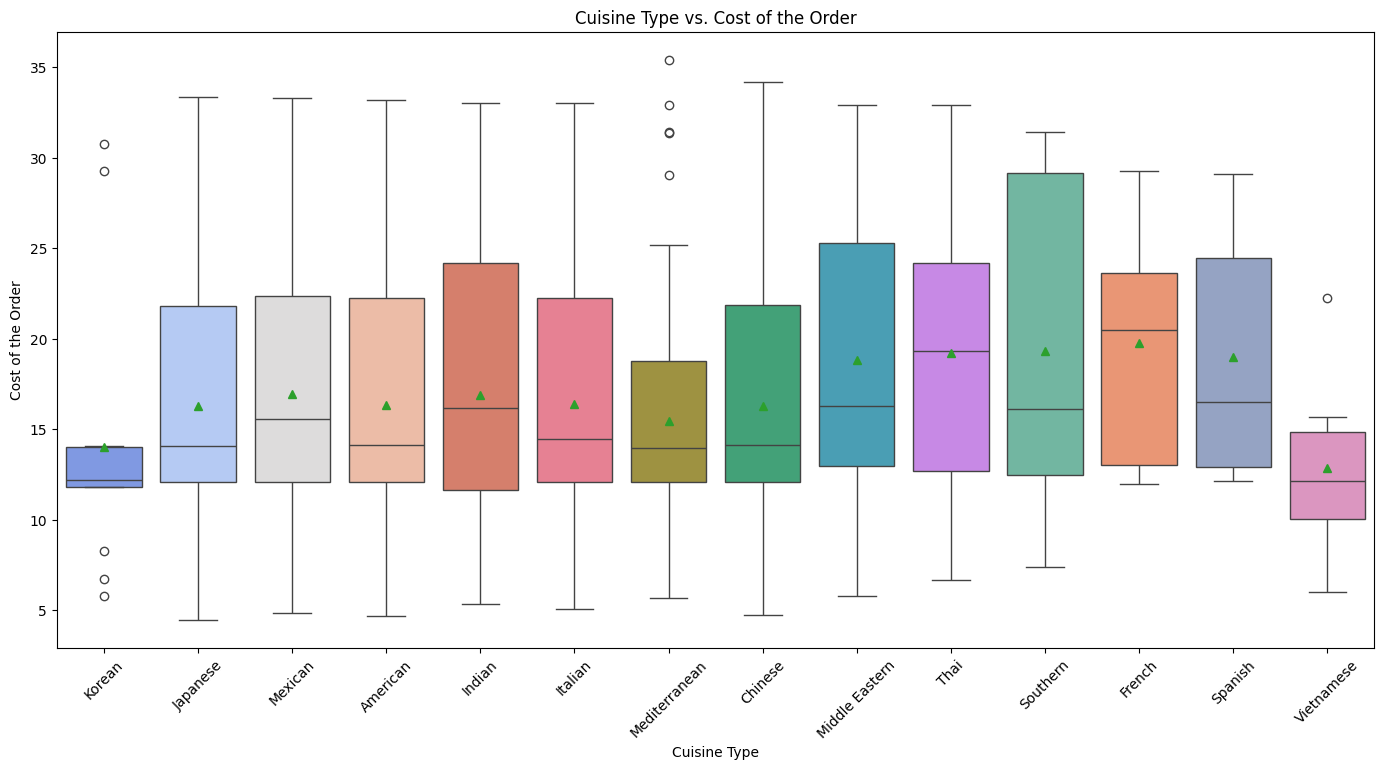

In [34]:
""" Plot as Boxplot to show the distribution of the cost within each cuisine type, showing the median, quartiles, and any outliers.
This is useful to understand how the costs vary within each cuisine category. """


plt.figure(figsize=(17,8))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, showmeans=True, palette = custom_palette, hue = "cuisine_type")


plt.title('Cuisine Type vs. Cost of the Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation = 45)
plt.show()

There seems to be outliers in Korean. Mediterranean and Vietnamese. Lets do a further analysis to udnerstand whether these are meaningful data or errors


In [35]:
# Lets collect some summary of the outliers. 
cuisines_with_outliers = ['Korean', 'Mediterranean', 'Vietnamese'] 

# Initialize a list to store results
outlier_stats = []

# Group by cuisine type and calculate IQR for each group
for cuisine, group in (df[df['cuisine_type'].isin(cuisines_with_outliers)]).groupby('cuisine_type'):
    # Calculate the Q1, Q3, and IQR for the 'cost_of_the_order' column
    Q1 = group['cost_of_the_order'].quantile(0.25)
    Q3 = group['cost_of_the_order'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers within this cuisine group
    min_outliers = group[(group['cost_of_the_order'] < lower_bound)]
    max_outliers = group[(group['cost_of_the_order'] > upper_bound)]

    # Calculate the percentage of outliers
    num_outliers = min_outliers.shape[0] + max_outliers.shape[0]
    total_count = group.shape[0]
    percentage_outliers = (num_outliers / total_count) * 100 if total_count > 0 else 0

    # Store the results
    outlier_stats.append({
        'cuisine': cuisine,
        'num_oders': total_count,
        'outliers%': round(percentage_outliers,2),
        'num_outliers': num_outliers,
        'min': min_outliers.shape[0],
        'max':max_outliers.shape[0]
    })

# Display the outlier statistics
print(pd.DataFrame(outlier_stats))


         cuisine  num_oders  outliers%  num_outliers  min  max
0         Korean         13      38.46             5    3    2
1  Mediterranean         46      10.87             5    0    5
2     Vietnamese          7      14.29             1    0    1


#### Observation
- General Observation
  * For most of the cuisines, the customers tend to order cheaper items as the median is below the mean. Except for French where the average order is slightly lower than the median indicating more customers are spending bit more than average.  
- Korean
  *  There are 38.46% outliers, denoting a couple of large orders and a few small orders.
  *  The minimum and maximum values for the cost of the order are close to the 25th and 75th percentiles. This suggests that the outliers may be valid (e.g., high-cost premium orders) rather than anomalies.
  *  Keeping the outliers aside the median is much lower than mean (right skewed), denoting cheaper orders.  
- Japanese
  * Median is closer to 25th percentle denoting most of the customers are spending less.
  * The price range seems to be wide with a minimum of around \\$4 and maximum of around \\$33.
  * There no outliers,indicating a consistent customer behaviour.
- Mexican
  * The cost trend seems to be similar to Japanese though the number of orders vary significantly.
  * The price range seems to be wide with a minimum of around \\$5 and maximum of around \\$33.
  * There no outliers,indicating a consistent customer behaviour.
- American
  * Median is closer to 25th percentle denoting most of the customers are spending less.
  * The price range seems to be wide with a minimum of around \\$4 and maximum of around \\$33.
  * Median is lower than mean (right skewed), denoting cheaper orders.
  * There no outliers,indicating a consistent customer behaviour.
- Indian
  * The Interquartile range (IQR) seems to be slightly higher denoting the diverse customer base.
  * The mean and median are closer denoting a consistent customer behaviour.
- Italian
  * Median is closer to 25th percentle denoting most of the customers are spending less.
  * The price range seems to be wide with a minimum of around \\$5 and maximum of around \\$33.
  * There no outliers,indicating a consistent customer behaviour.
- Mediterranean
  * There are 10.87% outliers towards the maximum range, denoting few bigger orders.
  * Keeping the outliers aside the price range seems to be closer.
  * Median is closer to 25th percentle denoting most of the customers are spending less.
- Chinese  
  * The price range seems to be widest with a minimum of around \\$4 and maximum of around \\$34.
  * Median is closer to 25th percentle denoting most of the customers are spending less.
  * There no outliers,indicating a consistent customer behaviour.
- Middle Eastern
  * The Interquartile range (IQR) seems to be slightly higher denoting the diverse customer base.
  * Median is lower than mean (right skewed), denoting cheaper orders.
  * The minumum price seems to be slightly higher at around \\$5.75.
- Thai
  * The median and mean are almost same denoting a consistent customer behaviour.
- Southern
  * The Interquartile range (IQR) seems to be higher denoting the highly diverse customer base.
  * Median is closer to 25th percentle denoting most of the customers are spending less.
- French
  * Mean is lower than median (left skewed) denoting more customers are spending more.
  * The 75th percentile is close to maximum denoting more customers are spending more as well.
  * The minumum price is close to \\$12 making it one of the most expensive cuisines.
- Spanish
  * The 75th percentile is close to maximum denoting more customers are spending more.
  * The minumum price is slightly over \\$12 making it the most expensive cuisine.
  * Median is lower than mean (right skewed), denoting more cheaper orders.
- Vietnamese
  * There is 1 outlier towards the maximum.
  * The 75th percentile is close to maximum denoting more customers are spending more as well.
  * Apart from the outlier the price range seems to be close.

#### Cuisine vs Day of the week

   day_of_the_week    cuisine_type  total_orders
0          Weekday        American           169
1          Weekday         Chinese            52
2          Weekday          French             5
3          Weekday          Indian            24
4          Weekday         Italian            91
5          Weekday        Japanese           135
6          Weekday          Korean             2
7          Weekday   Mediterranean            14
8          Weekday         Mexican            24
9          Weekday  Middle Eastern            17
10         Weekday        Southern             6
11         Weekday         Spanish             1
12         Weekday            Thai             4
13         Weekday      Vietnamese             3
14         Weekend        American           415
15         Weekend         Chinese           163
16         Weekend          French            13
17         Weekend          Indian            49
18         Weekend         Italian           207
19         Weekend  

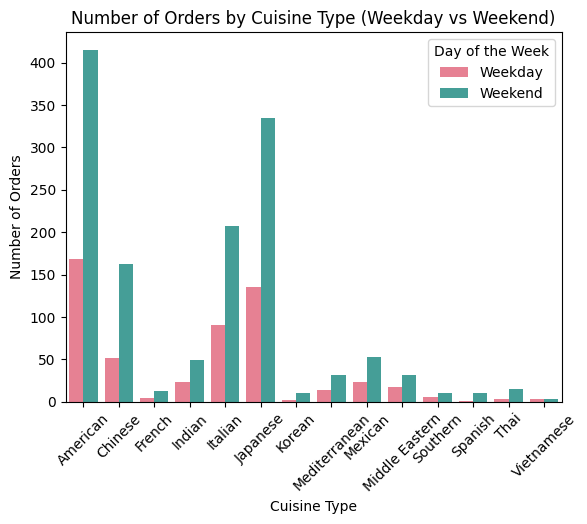

In [36]:
# Calculate the number of orders by cuisine and day of the week
order_count_by_day_of_week = df.groupby(['day_of_the_week','cuisine_type']).agg(total_orders=('order_id','count')).reset_index()
print(order_count_by_day_of_week)
sns.barplot(data=order_count_by_day_of_week, x='cuisine_type', y='total_orders', hue='day_of_the_week', palette='husl')

plt.title('Number of Orders by Cuisine Type (Weekday vs Weekend)')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')

plt.show()


From the chart it's evident that all the cusine types have more orders on weekends over the weekdays.<br/> 
Calculating the difference and the find out the percentage of difference over the weekdays vs weekend will help us to uderstand this pattern better as the number of orders vary between the cuisine types.

In [37]:
#The order_count_by_day_of_week is provides the total but it will be helpful to view the order counts by day of the week and the cuisine type
#Let's pivot the data frame with cuisine as the index and wekday, weekend and number of orders as columns
pivot_df = order_count_by_day_of_week.pivot_table(index='cuisine_type', columns='day_of_the_week', values='total_orders',aggfunc='sum')

print(pivot_df)

day_of_the_week  Weekday  Weekend
cuisine_type                     
American             169      415
Chinese               52      163
French                 5       13
Indian                24       49
Italian               91      207
Japanese             135      335
Korean                 2       11
Mediterranean         14       32
Mexican               24       53
Middle Eastern        17       32
Southern               6       11
Spanish                1       11
Thai                   4       15
Vietnamese             3        4


In [38]:
# There is a good difference in the number of order on a weekday vs weekend.
# It will be effective if we can calculate the percentage so we can visualize it better.
# Calculate the percentage over the difference in the number of orders in the weekend and weekday
pivot_df['weekend_vs_weekday_percent'] = ((pivot_df['Weekend'] - pivot_df['Weekday']) / pivot_df['Weekday']) * 100
pivot_df = pivot_df.sort_values(by='weekend_vs_weekday_percent', ascending=False)
print(pivot_df)

day_of_the_week  Weekday  Weekend  weekend_vs_weekday_percent
cuisine_type                                                 
Spanish                1       11                 1000.000000
Korean                 2       11                  450.000000
Thai                   4       15                  275.000000
Chinese               52      163                  213.461538
French                 5       13                  160.000000
Japanese             135      335                  148.148148
American             169      415                  145.562130
Mediterranean         14       32                  128.571429
Italian               91      207                  127.472527
Mexican               24       53                  120.833333
Indian                24       49                  104.166667
Middle Eastern        17       32                   88.235294
Southern               6       11                   83.333333
Vietnamese             3        4                   33.333333


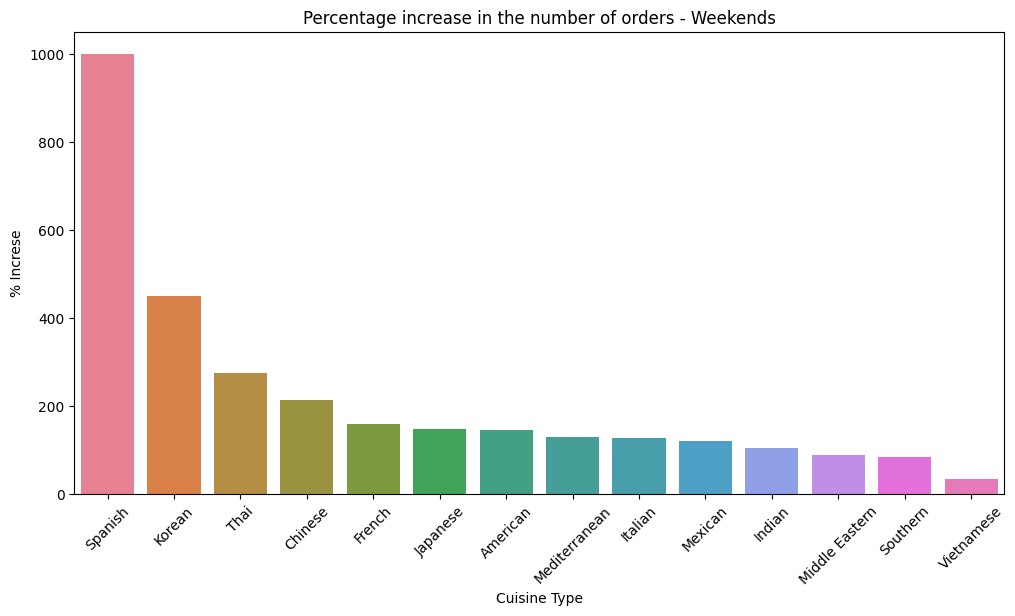

In [39]:

# Create the bar plot with 'cuisine_type' on the x-axis, 'day_of_the_week' as a hue, and 'percent' on the y-axis
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_df, x='cuisine_type', y='weekend_vs_weekday_percent', hue='cuisine_type')

# Add labels and title
plt.title('Percentage increase in the number of orders - Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('% Increse')

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.show()

#### Observation
- From the plotting the number of orders we learn't that the number of orders on the weekedns are higher than weekdays.
- From this above plot, we can see that Spanish has most of the orders on the weekend. Other cusisines have the same trend.
- Vietnamese is consistent only with a slight increase.

#### Cuisine vs Food Preparation time

      cuisine_type   std_dev  mean_prep_time  max_prep_time  min_prep_time
0         American  4.658474       27.440068             35             20
1          Chinese  4.758525       27.511628             35             20
2           French  5.039712       26.888889             35             21
3           Indian  4.620491       27.109589             35             20
4          Italian  4.519474       27.483221             35             20
5         Japanese  4.604496       27.510638             35             20
6           Korean  3.971049       25.461538             33             20
7    Mediterranean  4.908043       27.000000             35             20
8          Mexican  4.604450       26.727273             35             20
9   Middle Eastern  4.012417       26.673469             34             20
10        Southern  5.523346       27.588235             35             20
11         Spanish  4.501683       26.916667             35             20
12            Thai  5.498

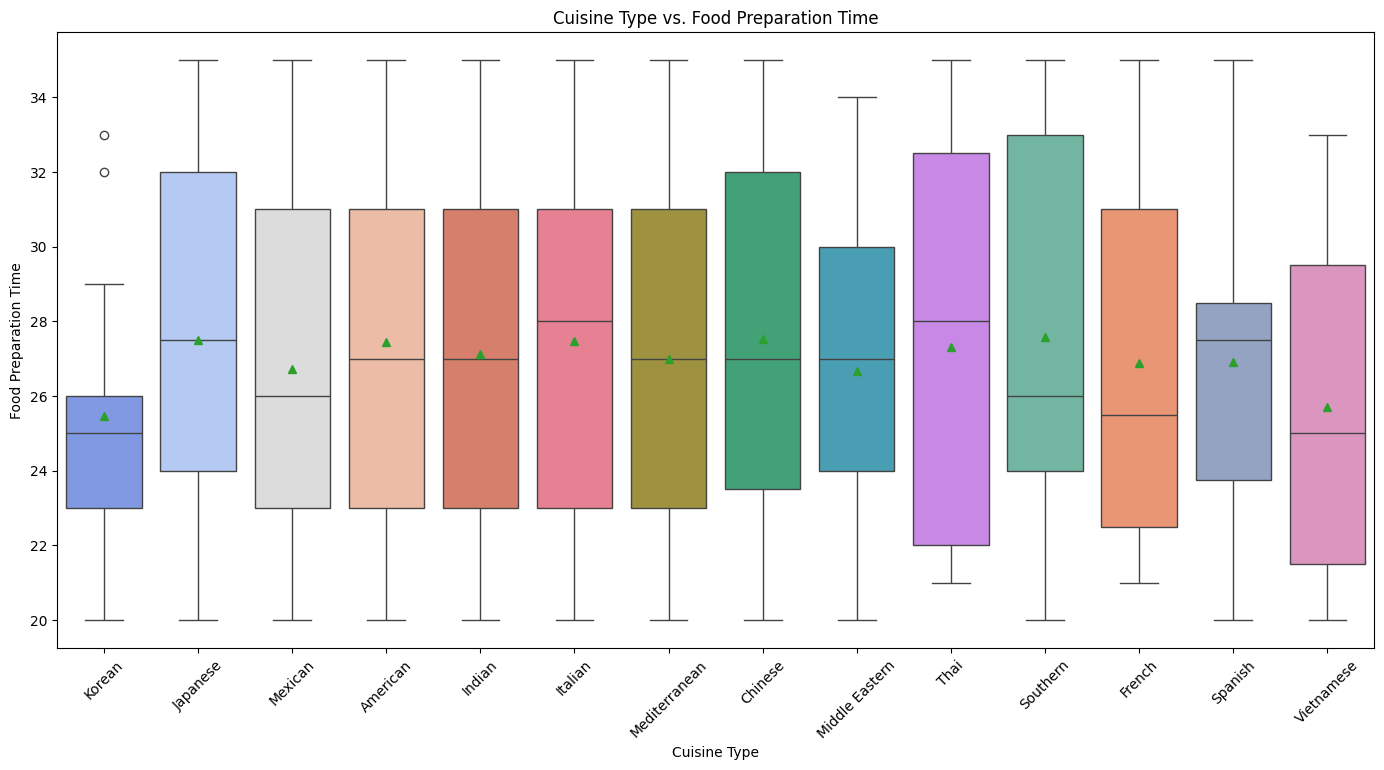

In [40]:
""" Plot as Boxplot to show the distribution of the cost within each cuisine type, showing the median, quartiles, and any outliers.
This is useful to understand how the food preparation time vary within each cuisine category. """

# Claculate the statistical summary of the food_preparation_time, to understand how it varies by cuisine type.
prep_time_stats = df.groupby('cuisine_type')['food_preparation_time'].agg(
    std_dev='std',
    mean_prep_time='mean',
    max_prep_time='max',
    min_prep_time='min'
).reset_index()

print(prep_time_stats)
      
plt.figure(figsize=(17,8))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, showmeans=True, hue = "cuisine_type", palette = custom_palette)


plt.title('Cuisine Type vs. Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation = 45)
plt.show()

#### Observation
- Only Korean has an outlier, this some aligns with the outlier we saw with cost of the order. This suggests those orders could have been biger orders.
- The preparation time range for Korean is small suggesting that most of the orders take anywhere from 23 to 24 minutes.
- Japanese, Indian and Mediterranean have mean and median almost the same, this implies a symmetric distribution and a consistent preparation time.
- Mexican, American, Indian, Italian and Mediterranean cuisines are have similar pattern in preparation time.
- Thai has a wider range, signifying the preparation time varies significantly, this could be based on the dish.
- For Spanish the median is close to 75th percentile, implying that most of the orders had longer preparation time.
- Southern, Thai, Vietnamese and French show the highest standard deviation, signifying the preparation time varies significantly. This could be based on the dish or kitchen inefficiencies.
- Korean and Middle Eastern has the lowest standard deviation implying a consistent preparation process and efficiency.

#### Cuisine vs Delivery time

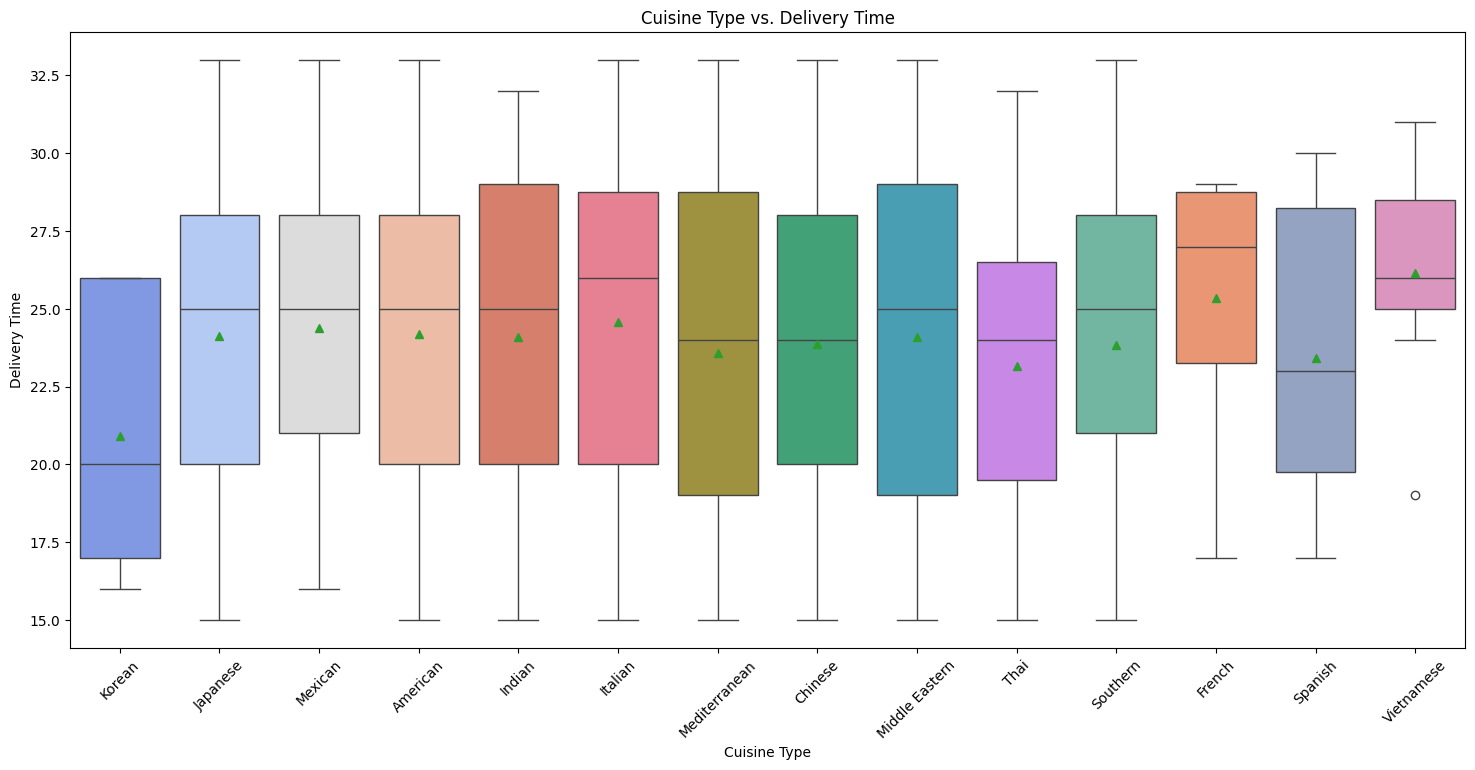

In [41]:
plt.figure(figsize=(18,8))
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = df, showmeans=True, hue = "cuisine_type", palette = custom_palette)


plt.title('Cuisine Type vs. Delivery Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time')
plt.xticks(rotation = 45)
plt.show()

#### Observation
- Analysing the delivery time and cuisine type can help us understand the spread of the orders relative to the restaurant location.
- Vietnamese has outlier but it seems to have the highest minimum delivery times with around 23 minutes.
- French has the 75th percentile close to the maximum which implies most of th orders delivered within a predictable time, with very few taking significantly longer. 

#### Cuisine Type Vs Rating

In [42]:
# During the initial analysis we found there are missing ratings, first lets find the missing ratings per cuisine type
#  Filter rows where the rating is 'Not given' and count missing ratings
missing_ratings = df_original[df_original['rating'] == 'Not given']
missing_counts = missing_ratings.groupby('cuisine_type').size().reset_index(name='missing_count')

# Count total orders for each cuisine_type
total_orders = df_original.groupby('cuisine_type').size().reset_index(name='total_orders')

# Merge missing counts with total orders
summary = pd.merge(missing_counts, total_orders, on='cuisine_type')

# Calculate the percentage of missing ratings
summary['missing_percentage'] = (summary['missing_count'] / summary['total_orders']) * 100

#  Sort by percentage in descending order
summary = summary.sort_values(by='missing_percentage', ascending=False)

# Display the result
print(summary)


      cuisine_type  missing_count  total_orders  missing_percentage
12            Thai             10            19           52.631579
11         Spanish              6            12           50.000000
2           French              8            18           44.444444
4          Italian            126           298           42.281879
5         Japanese            197           470           41.914894
1          Chinese             82           215           38.139535
8          Mexican             29            77           37.662338
0         American            216           584           36.986301
3           Indian             23            73           31.506849
6           Korean              4            13           30.769231
9   Middle Eastern             15            49           30.612245
7    Mediterranean             14            46           30.434783
13      Vietnamese              2             7           28.571429
10        Southern              4            17 

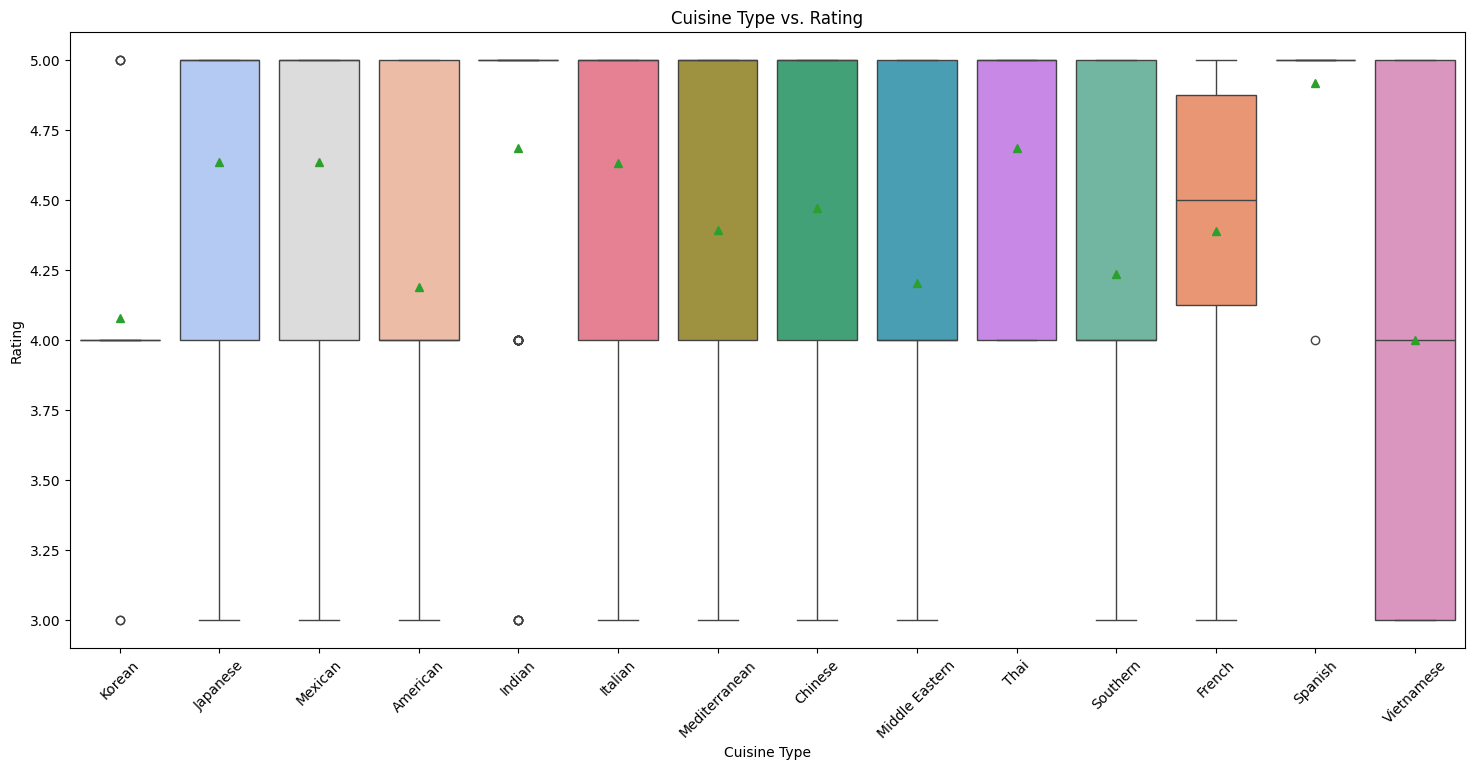

In [43]:
# Let's use the imputed rating to understand the distribution by cusine type.
plt.figure(figsize=(18,8))
sns.boxplot(x = "cuisine_type", y = "rating", data = df, showmeans=True, hue = "cuisine_type", palette = custom_palette)


plt.title('Cuisine Type vs. Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation = 45)
plt.show()


#### Observation
- This observation is on the imputed rating.
- The minimum rating for most of the cuisine is 3 expect for Korean, Indian, Thai and Spanish.
- Most of the restaurants have the 25th percentile at 4. Since we imputed with Meidan the high and 75th percentile became the same for most of the restaurants.
- Thai and Spanish doesn't have ratings for over 50% of their orders.
- Spanish and Indian has the highest ratings ignoring the outliers.
- Vitenamese ratings is symetrically distrubuted. French and Spanish are Left skewed other are right skewed.


#### Average Cost of the Order: Weekday vs. Weekend

                cost_weekend  cost_weekday  cost_diff
cuisine_type                                         
Spanish            12.130000     19.618182  -7.488182
Thai               15.462500     20.206667  -4.744167
Korean             12.180000     14.332727  -2.152727
Mediterranean      14.040000     16.102500  -2.062500
Vietnamese         11.916667     13.607500  -1.690833
American           15.308343     16.731735  -1.423392
Mexican            16.555833     17.103962  -0.548129
Southern           19.226667     19.340909  -0.114242
Japanese           16.368074     16.278925   0.089149
Indian             17.162500     16.800816   0.361684
Italian            16.890110     16.211449   0.678661
Chinese            17.147692     16.036442   1.111251
French             20.866000     19.381538   1.484462
Middle Eastern     19.832941     18.282812   1.550129


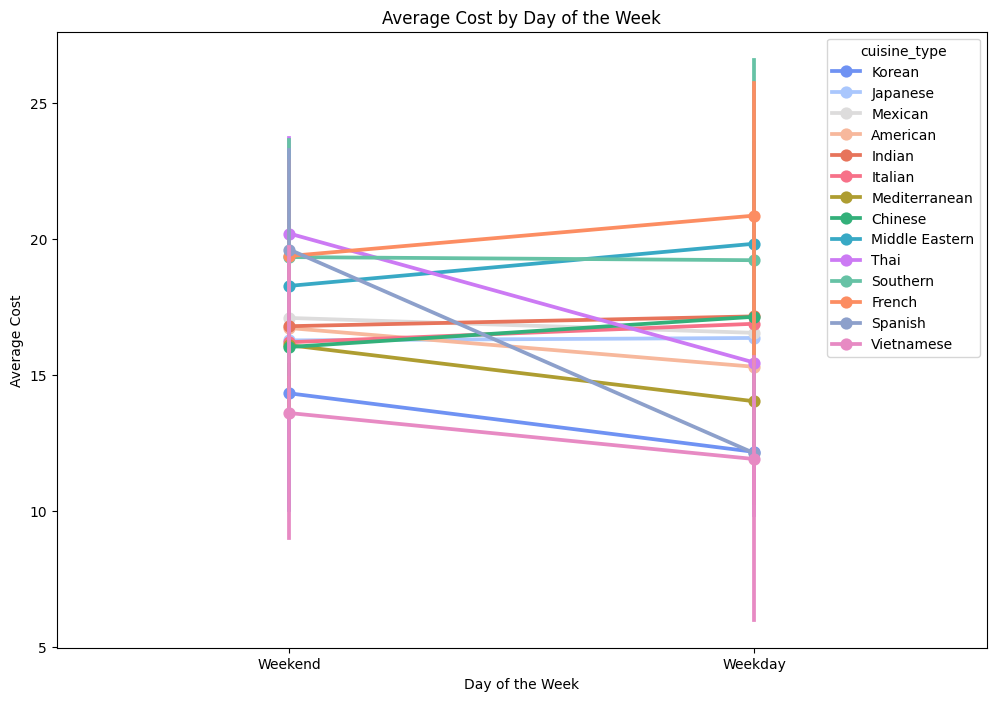

In [44]:
#Calculate average cost over weekday and weekend, grouping by cuisine type
average_cost = df.groupby(['day_of_the_week','cuisine_type'])['cost_of_the_order'].mean().reset_index()
average_cost = average_cost.sort_values(by=['cuisine_type','day_of_the_week']).reset_index(drop=True)

# pivot the data frame to calculate the difference of cost b/w weekday and weekend
pivot_df = df.pivot_table(index='cuisine_type', columns='day_of_the_week', values='cost_of_the_order', aggfunc='mean')
pivot_df.columns = ['cost_weekend', 'cost_weekday']
pivot_df['cost_diff'] = pivot_df['cost_weekend'] - pivot_df['cost_weekday']

pivot_df = pivot_df.sort_values(by='cost_diff')
print(pivot_df)

# Create the point plot
plt.figure(figsize=(12, 8))
sns.pointplot(data=df, x='day_of_the_week', y='cost_of_the_order', estimator='mean', hue='cuisine_type', palette = custom_palette)

# Add labels and title
plt.title('Average Cost by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Cost')
plt.show()



#### Observation
- There is no significant difference in overall average cost of the order over the weekend or weekday.
- While breaking it down by cusinie type, we see the pattern changing
  * Orders for Chinese, French and Middle Eastern have slightly higher cost, around a dollar on the weekend compared to weekdays
  * Order for Spanish,Thai,Korean, Mediterranean, Vietnamese and American, have slightly higer cost on the weekdays.
    * Spanish and Thai costing more with a difference of \\$7 and \\$4 respctively.
    * This suggests bigger orders for these cuisines over the weekdays

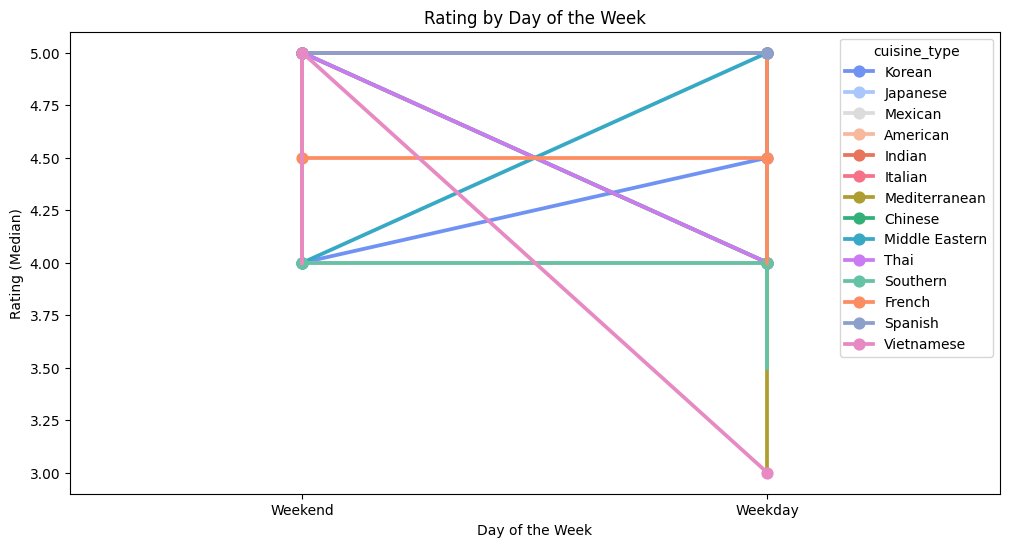

In [45]:
# Create the point plot to visualize the difference in rating based on day of the week
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='day_of_the_week', y='rating', estimator='median', hue='cuisine_type',palette = custom_palette)

# Add labels and title
plt.title('Rating by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Rating (Median)')
plt.show()


#### Observation
-  We are doing a median here as we want to learn about the what majority of the customer say about the service.
- Rating looks stable across weekend and weekdays except for Vietnamese,Thai, Korean and Middle Eastern.
- Vietnamese and Thai have an higher ratings for the weekend orders while Thai and Middle Eastern has a higher rating on the weekdays.

#### Day of the Week vs Food Preparation Time

                food_preparation_time            total_orders        
day_of_the_week               Weekday    Weekend      Weekday Weekend
cuisine_type                                                         
American                    27.408284  27.453012          169     415
Chinese                     28.076923  27.331288           52     163
French                      27.200000  26.769231            5      13
Indian                      26.333333  27.489796           24      49
Italian                     27.417582  27.512077           91     207
Japanese                    27.281481  27.602985          135     335
Korean                      23.000000  25.909091            2      11
Mediterranean               25.785714  27.531250           14      32
Mexican                     25.625000  27.226415           24      53
Middle Eastern              27.235294  26.375000           17      32
Southern                    26.166667  28.363636            6      11
Spanish             

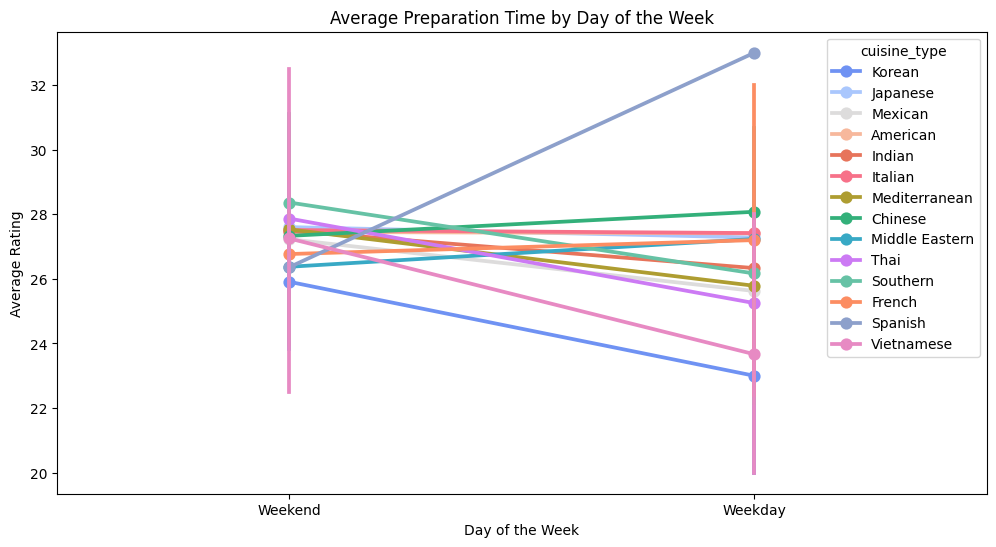

In [46]:
#Calculate average food preparation time over weekday and weekend
average_time_df = df.groupby(['day_of_the_week','cuisine_type']).agg(\
                                               food_preparation_time=('food_preparation_time','mean'),\
                                               total_orders=('order_id','count'))


# pivot the data frame to calculate the difference of cost b/w weekday and weekend
pivot_df = average_time_df.pivot_table(index='cuisine_type', columns='day_of_the_week', values=['food_preparation_time','total_orders'], aggfunc='mean')

pivot_df.reset_index(drop=True)
print(pivot_df)


# Create the point plot
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='day_of_the_week', y='food_preparation_time', estimator='mean', hue='cuisine_type',palette = custom_palette)

# Add labels and title
plt.title('Average Preparation Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')
plt.show()


#### Observation
 - Food Preparation has a central tendency on the weekends where as we see varied values for weekdays.
 - The most variations are observed for Spanish, Vietnamese and Korean.
    * Spanish has the higest variation, this is inline with the higer cost during the weekday, where as number of orders are higher on the weekdays.This suggests a bigger order on a weekday while the kitchen could be under staffed, we dont have enough data to confirm this fact.
    * Vietnamese and Korean has less prepartion time on the weekdays suggesting less orders.

#### Day of the Week vs Delivery Time

                delivery_time            total_orders        
day_of_the_week       Weekday    Weekend      Weekday Weekend
cuisine_type                                                 
American            28.248521  22.542169          169     415
Chinese             28.826923  22.269939           52     163
French              27.200000  24.615385            5      13
Indian              27.625000  22.346939           24      49
Italian             28.802198  22.705314           91     207
Japanese            28.133333  22.519403          135     335
Korean              26.000000  20.000000            2      11
Mediterranean       28.785714  21.312500           14      32
Mexican             28.250000  22.641509           24      53
Middle Eastern      28.470588  21.750000           17      32
Southern            29.500000  20.727273            6      11
Spanish             28.000000  23.000000            1      11
Thai                26.500000  22.266667            4      15
Vietname

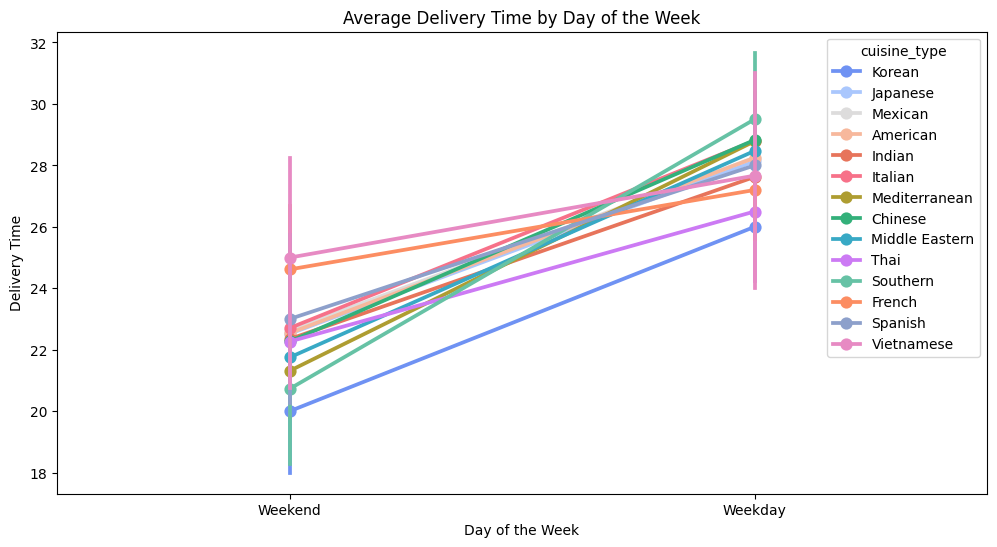

In [47]:
#Calculate average food preparation time over weekday and weekend
average_del_time_df = df.groupby(['day_of_the_week','cuisine_type']).agg(\
                                               delivery_time=('delivery_time','mean'),\
                                               total_orders=('order_id','count'))


# pivot the data frame to calculate the view the delivery time and totoal orders by weekday and weekend
pivot_df = average_del_time_df.pivot_table(index='cuisine_type', columns='day_of_the_week', values=['delivery_time','total_orders'], aggfunc='mean')

pivot_df.reset_index(drop=True)
print(pivot_df)


# Create the point plot
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='day_of_the_week', y='delivery_time', estimator='mean', hue='cuisine_type',palette = custom_palette)

# Add labels and title
plt.title('Average Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()


#### Observation
- The delivery time is on the weekdays are significantly higher than the weekends.
- The number of orders is inveerse.
- This suggests the delivery team could be understaffed or it could influenced by other external factors like traffic.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [48]:
# Since rating count is a requirement, lets make a copy of the original dataframe and convert the rating column to numeric ignoring the errors
df_cleansed_rating = df_original.copy()
df_cleansed_rating['rating'] = pd.to_numeric(df_cleansed_rating['rating'], errors='coerce')

# Step 1: Count ratings for each restaurant
rating_counts = df_cleansed_rating.groupby('restaurant_name')['rating'].count()

# Step 2: Filter restaurants with more than 50 ratings
restaurants_with_enough_ratings = rating_counts[rating_counts > 50].index

# Step 3: Calculate the average rating for the restaurants with >50 ratings
filtered_df = df_cleansed_rating[df_cleansed_rating['restaurant_name'].isin(restaurants_with_enough_ratings)]
avg_ratings = filtered_df.groupby('restaurant_name')['rating'].mean()

# Step 4: Filter for restaurants with an average rating > 4 and sort by their average rating
eligible_restaurants = avg_ratings[avg_ratings > 4].sort_values(ascending=False)

print(f'Number of restaurants: {len(eligible_restaurants)}')
print(f'Restaurants and their average ratings:\n{eligible_restaurants}')


Number of restaurants: 4
Restaurants and their average ratings:
restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64


#### Observations:
- There are 4 restauratns meeting the cretria to get the promotional offer.
- The restaurants are,
  1. The Meatball Shop
  2. Blue Ribbon Fried Chicken
  3. Shake Shack
  4. Blue Ribbon Sushi



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [49]:
# Calculate the commission based on the agreed rate
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to calculate commission for each order
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate total revenue for the company
total_revenue = df['commission'].sum()

total_sales = df['cost_of_the_order'].sum()

percent = (total_revenue / total_sales) * 100

print(f'Net revenue: ${total_revenue:.2f} Percentage of sales {percent:.2f}%')

Net revenue: $6166.30 Percentage of sales 19.69%


#### Observations:
The net revenue generated by the company is `$6166.30` which is `19.66%` of total sales

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [50]:
#Calculate total time which includes preparation time and delivery time. Add it as a new column
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#Filter orders with delivery time greater than 60 minutes
orders_over_60_minutes = df[df['total_time'] > 60]

#Calculate the percentage
percentage_over_60 = (len(orders_over_60_minutes) / len(df)) * 100


print(f"{percentage_over_60:.2f}%")


10.54%


#### Observations:
Percentage of orders that take more than 60 minutes to deliver: `10.54%`


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

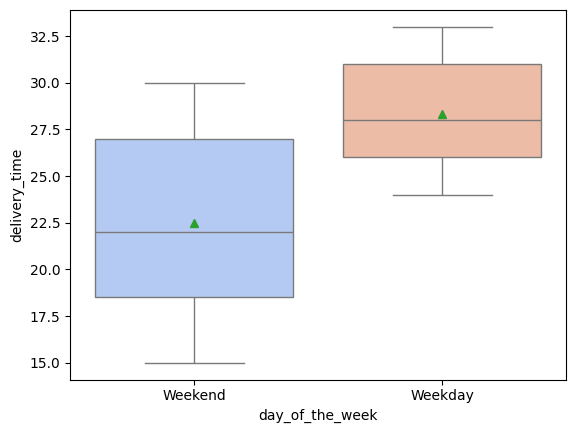

Mean Delivery Time for Weekdays and Weekends:
day_of_the_week
Weekday    28.0
Weekend    22.0
Name: delivery_time, dtype: float64


In [51]:
# Calculate mena delivery times based on day_of_week
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean().round()

sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, showmeans=True, palette='coolwarm', hue='day_of_the_week')
plt.show()

print("Mean Delivery Time for Weekdays and Weekends:")
print(mean_delivery_time)


#### Observations:
- The Mean delivery times for Weekdays is higher at 28 minutes where as it is 22 minutes in a Weekend.
- Even the minimum delivery time on a weekday is higher than the average delivery time on a weekend.
- This shows that the same order from the same restaturant provides a varying customer satisification based on the day of the order
- This could be due to avaialbility of delivery team and it could be a reson for having low orders over the weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Revenue Insights:
   - Top 10% of restaurants contribute to over 45% of the total revenue. Indicating a concentration of customer orders among key players.
   - Weekends drive higher revenue across all cuisine types.
* Operational Insights:
   - Southern, Thai, Vietnamese and French show the highest standard deviation, signifying the preparation time varies significantly. This could be based on the dish or kitchen inefficiencies. Identify and improve their performance to improve the revenue.
   - Food Preparation has a central tendency on the weekends where as we see varied values for weekdays.
   - The delivery time is significantly higher in the weekdays compared to the weekends, inspite of the low orders. This suggests the delivery team could be understaffed or it could influenced by other external factors like traffic.
*  Customer Preferences:
   - Customers tend to use the service more on the weekends.
   - The most preferred cuisine is American which has over 30% of the orders.

### Recommendations:

* Most of the orders are in the weekend, incentive the customers for weekday orders to grow the revenue of the weekdays.
* Focus on the delivery time on the weekdays and make it consistent with weekends, this could help improving the number of orders.
* Conduct surveys with the customer base at random days to learn their preference, which can be used to run promotions.
* Only 62% of the customers have providede rating. Encourage customers to provide rating.
* Can provide option to the customers to place recuring orders to promote more sales.

---